#Preparação dos dados

In [ ]:
import pandas as pd

In [ ]:
url = ('/content/dados_tratados.csv')
df = pd.read_csv(url)

In [ ]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
0,0002-Orfbo,No,Female,0,Yes,Yes,9,Yes,No,Dsl,...,No,Yes,Yes,No,One Year,Yes,Mailed Check,65.6,593.30,2.186667
1,0003-Mknfe,No,Male,0,No,No,9,Yes,Yes,Dsl,...,No,No,No,Yes,Month-To-Month,No,Mailed Check,59.9,542.40,1.996667
2,0004-Tlhlj,Yes,Male,0,No,No,4,Yes,No,Fiber Optic,...,Yes,No,No,No,Month-To-Month,Yes,Electronic Check,73.9,280.85,2.463333
3,0011-Igkff,Yes,Male,1,Yes,No,13,Yes,No,Fiber Optic,...,Yes,No,Yes,Yes,Month-To-Month,Yes,Electronic Check,98.0,1237.85,3.266667
4,0013-Exchz,Yes,Female,1,Yes,No,3,Yes,No,Fiber Optic,...,No,Yes,Yes,No,Month-To-Month,Yes,Mailed Check,83.9,267.40,2.796667


##Eliminar colunar irrelevantes

In [ ]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Contas_Diarias'],
      dtype='object')

In [ ]:
df.drop(['customerID'], axis=1, inplace=True)

In [ ]:
df.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
0,No,Female,0,Yes,Yes,9,Yes,No,Dsl,No,...,No,Yes,Yes,No,One Year,Yes,Mailed Check,65.6,593.30,2.186667
1,No,Male,0,No,No,9,Yes,Yes,Dsl,No,...,No,No,No,Yes,Month-To-Month,No,Mailed Check,59.9,542.40,1.996667
2,Yes,Male,0,No,No,4,Yes,No,Fiber Optic,No,...,Yes,No,No,No,Month-To-Month,Yes,Electronic Check,73.9,280.85,2.463333
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber Optic,No,...,Yes,No,Yes,Yes,Month-To-Month,Yes,Electronic Check,98.0,1237.85,3.266667
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber Optic,No,...,No,Yes,Yes,No,Month-To-Month,Yes,Mailed Check,83.9,267.40,2.796667


##Encoding

In [ ]:
# Removemos espaços em 'Churn' e o convertemos se ainda estiver em texto
df['Churn'] = df['Churn'].astype(str).str.strip()

# Mapeamos
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

#Excluímos linhas com valores nulos em 'Churn'
df = df.dropna(subset=['Churn'])

# Converter
df['Churn'] = df['Churn'].astype(int)

# Confirmar valores únicos
print(df['Churn'].unique())


[0 1]


In [ ]:
#Identificamos colunas categóricas para fazer codificação
categorical_cols = [
    'customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines',
    'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
    'account.PaperlessBilling', 'account.PaymentMethod'
]

In [ ]:
#Aplicar codificação One-Hot
#'drop_first=True' remove uma categoria para evitar multicolinearidade
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
# Converter colunas booleanas em inteiros
df_encoded = df_encoded.astype({col: int for col in df_encoded.select_dtypes('bool').columns})

##Verificação da Taxa de Cancelamento (Churn)

In [ ]:
#Verificamos quantos clientes cancelaram e quantos não cancelaram.
churn_counts = df_encoded['Churn'].value_counts()
print("Distribuição de rotatividade (0 = Não cancelado, 1 = Cancelado):\n", churn_counts)

# Calcular proporção
churn_proportions = df_encoded['Churn'].value_counts(normalize=True)
print("\nProporção de cada classe:\n", churn_proportions)

# Mostrando porcentagem
print("\nProporção em %:")
print((churn_proportions * 100).round(2).astype(str) + '%')


Distribuição de rotatividade (0 = Não cancelado, 1 = Cancelado):
 Churn
0    5174
1    1869
Name: count, dtype: int64

Proporção de cada classe:
 Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

Proporção em %:
Churn
0    73.46%
1    26.54%
Name: proportion, dtype: object


##Balanceamento de Classe

###Faremos o balanceamento de classes, já que o desequilíbrio é moderado, a melhor opção é usar a sobreamostragem.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import pandas as pd
from collections import Counter

# --- 1. Variáveis preditoras separadas (X) e variável alvo (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# --- 2. Dividido em treinamento e teste com estratificação
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- 3. Imputar valores ausentes em X_train (com média)
imputer = SimpleImputer(strategy='mean')  # Você pode alterá-lo para "mediana", se preferir.
X_train_imputed = imputer.fit_transform(X_train)

# --- 4. Reconstruir DataFrame (porque fit_transform retorna array)
X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns)

# --- 5. Aplicar SMOTE ao conjunto de treinamento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# --- 6. Verifique o balanço
print("Distribuição antes do SMOTE:", Counter(y_train))
print("Distribuição após SMOTE:", Counter(y_train_resampled))


Distribuição antes do SMOTE: Counter({0: 3622, 1: 1308})
Distribuição após SMOTE: Counter({0: 3622, 1: 3622})


##Normalização ou Padronização

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inicializar scaler
scaler = StandardScaler()

# Ajuste e transforme SOMENTE X_train_resampled
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Transforme X_test com o mesmo scaler
X_test_scaled = scaler.transform(X_test)


#Correlação e Seleção de Variáveis

##Análise de Correlação

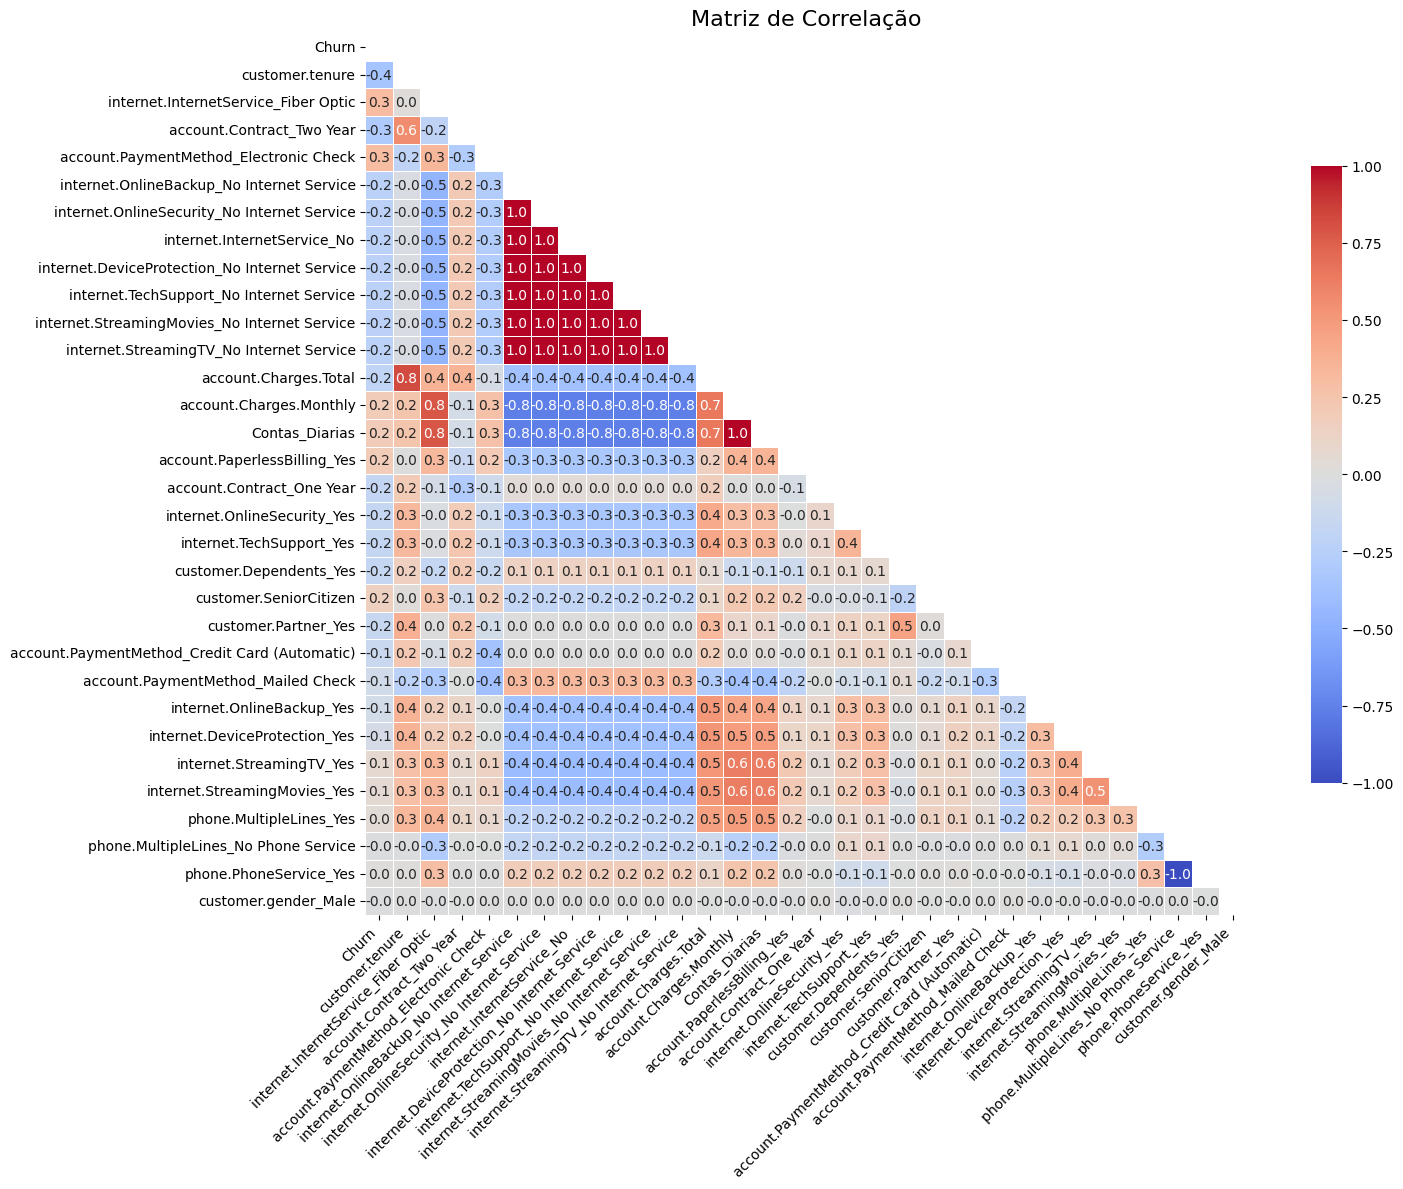

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular matriz de correlação apenas com colunas numéricas
corr_matrix = df_encoded.corr(numeric_only=True)

# --- (Opcional) Classificar colunas por sua correlação com a rotatividade
corr_matrix = corr_matrix.loc[
    corr_matrix['Churn'].abs().sort_values(ascending=False).index,
    corr_matrix['Churn'].abs().sort_values(ascending=False).index
]

# --- (Opcional) Crie uma máscara para mostrar apenas a metade inferior
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# --- Crie o mapa de calor
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt='.1f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7}
)

plt.title('Matriz de Correlação', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Análise Dirigida

### Tempo de contrato vs. cancelamento

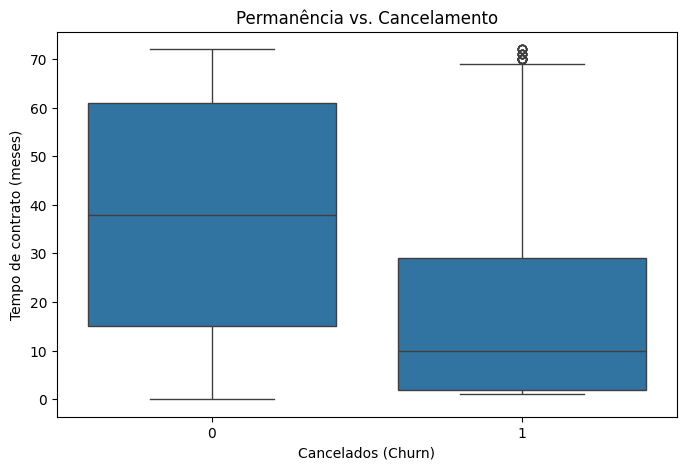

In [ ]:
# Criamos o gráfico de tempo de contrato vs. cancelamento
plt.figure(figsize=(8, 5))

# --- Crie um boxplot para ver como a duração do contrato varia dependendo se o cliente cancelou ou não.
sns.boxplot(x='Churn', y='customer.tenure', data=df_encoded)

# --- Títulos e tags
plt.title('Permanência vs. Cancelamento')
plt.xlabel('Cancelados (Churn)')
plt.ylabel('Tempo de contrato (meses)')

plt.show()

###  Despesa Total vs. Cancelamento

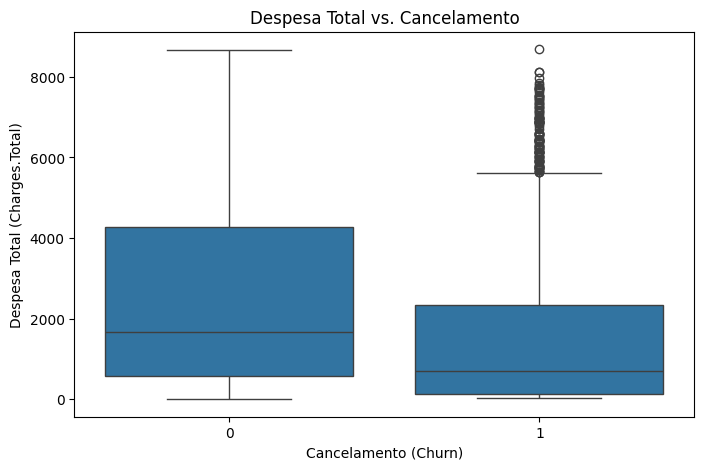

In [ ]:
plt.figure(figsize=(8, 5))

# --- Criamos um boxplot para comparar a despesa total (Charges.Total) entre clientes que cancelaram e aqueles que não cancelaram.
sns.boxplot(x='Churn', y='account.Charges.Total', data=df_encoded)

# --- Títulos e tags
plt.title('Despesa Total vs. Cancelamento')
plt.xlabel('Cancelamento (Churn)')
plt.ylabel('Despesa Total (Charges.Total)')

plt.show()

### Permanência vs Despesa Total (Churn)

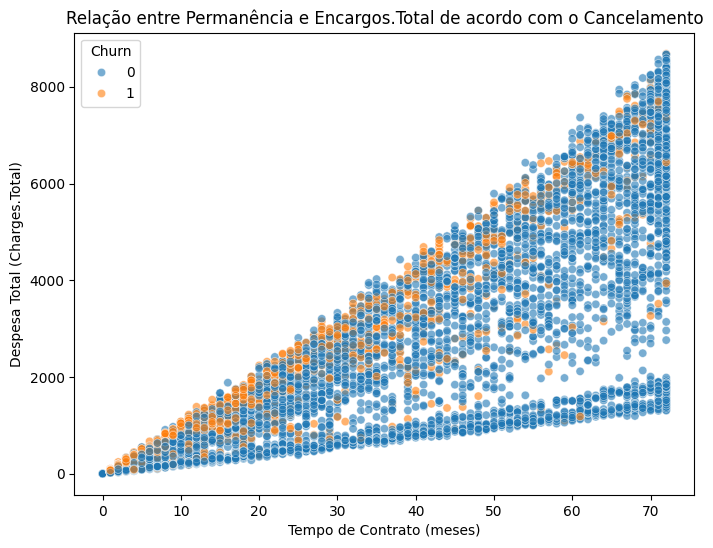

In [ ]:
plt.figure(figsize=(8, 6))

# --- Criamos um gráfico de dispersão para ver a relação entre o tempo do contrato e a despesa total
# --- hue='Churn' colore os pontos com base no fato de terem sido cancelados ou não
sns.scatterplot(data=df_encoded, x='customer.tenure', y='account.Charges.Total', hue='Churn', alpha=0.6)

# --- Títulos y etiquetas
plt.title('Relação entre Permanência e Encargos.Total de acordo com o Cancelamento')
plt.xlabel('Tempo de Contrato (meses)')
plt.ylabel('Despesa Total (Charges.Total)')
plt.legend(title='Churn')

plt.show()

#Modelagem Preditiva

## Separação de dados

In [ ]:
from sklearn.model_selection import train_test_split

# --- 1. Separe as variáveis preditoras (X) e a variável alvo (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# --- 2.Dividido em treinamento (70%) e teste (30%) com estratificação para manter a proporção de classes
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# --- 3. Exibir tamanhos de conjuntos
print(f"X_train: {X_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"Distribuição em y_train:\n{y_train.value_counts(normalize=True)}")
print(f"Distribuição em y_test:\n{y_test.value_counts(normalize=True)}")

X_train: (4930, 31)
X_test:  (2113, 31)
Distribuição em y_train:
Churn
0    0.734686
1    0.265314
Name: proportion, dtype: float64
Distribuição em y_test:
Churn
0    0.734501
1    0.265499
Name: proportion, dtype: float64


##Criação de modelo

In [ ]:
#Modelo 1: Regressão Logística (com normalização)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# --- Treine o modelo com dados normalizados e balanceados
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train_resampled)

# --- Prever no conjunto de teste (também normalizado)
y_pred_logreg = logreg.predict(X_test_scaled)

# --- Avaliação do modelo
print("=== Regressão Logística ===")
print("Matriz de confusão:")
print(confusion_matrix(y_test, y_pred_logreg))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_logreg, digits=3))

=== Regressão Logística ===
Matriz de confusão:
[[1126  426]
 [ 112  449]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0      0.910     0.726     0.807      1552
           1      0.513     0.800     0.625       561

    accuracy                          0.745      2113
   macro avg      0.711     0.763     0.716      2113
weighted avg      0.804     0.745     0.759      2113



In [ ]:
X_test_imputed = imputer.transform(X_test)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns)
X_test_scaled = scaler.transform(X_test_imputed)
y_pred_logreg = logreg.predict(X_test_scaled)

Por que normalizamos dados em modelos baseados em distância ou otimização?

Modelos como Regressão Logística, K-Vizinhos Mais Próximos (KNN), Máquinas de Vetores de Suporte (SVM) e Redes Neurais utilizam algoritmos que:

Calculam distâncias entre pontos (KNN, SVM com kernel)

Se as variáveis tiverem escalas diferentes, o algoritmo tenderá a favorecer variáveis com valores maiores, pois seu alcance domina as distâncias ou gradientes.

Variáveis com valores pequenos podem se tornar irrelevantes para o modelo.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Treinamento do modelo Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
#Árvore de Decisão Modelo 2 (sem normalização)

from sklearn.tree import DecisionTreeClassifier

# Treinamos o modelo com dados não escalonados, mas imputados e balanceados.
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_resampled, y_train_resampled)

# --- Prever no conjunto de teste (também não escalonado)
y_pred_tree = tree.predict(X_test)

# --- Avaliação do modelo
print("=== Árvore de decisão ===")
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_tree))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_tree, digits=3))

=== Árvore de decisão ===
Matriz de Confusão:
[[1249  303]
 [ 289  272]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0      0.812     0.805     0.808      1552
           1      0.473     0.485     0.479       561

    accuracy                          0.720      2113
   macro avg      0.643     0.645     0.644      2113
weighted avg      0.722     0.720     0.721      2113



## Avaliação do modelo

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

Regressão Logística
Acurácia: 0.7453857075248462
Precisão: 0.5131428571428571
Recall: 0.8003565062388592
F1-score: 0.6253481894150418

Relatório completo:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1552
           1       0.51      0.80      0.63       561

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.76      2113



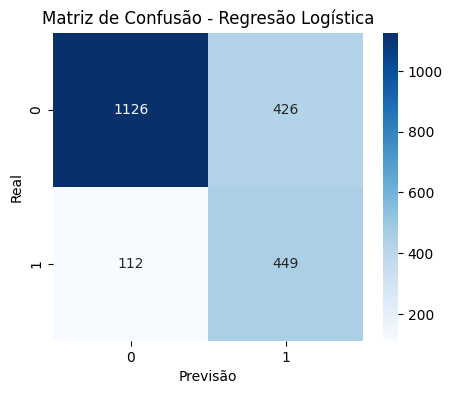

In [ ]:
#Avalie o Modelo 1 — Regressão Logística

# --- Previsões
y_pred_logreg = logreg.predict(X_test_scaled)

# --- Relatório de métricas
print("Regressão Logística")
print("Acurácia:", accuracy_score(y_test, y_pred_logreg))
print("Precisão:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print("F1-score:", f1_score(y_test, y_pred_logreg))
print("\nRelatório completo:\n", classification_report(y_test, y_pred_logreg))

# --- Matriz de confusão
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - Regresão Logística")
plt.xlabel("Previsão")
plt.ylabel("Real")
plt.show()

Random Forest
Accuracy: 0.7785139611926172
Precision: 0.594704684317719
Recall: 0.5204991087344029
F1-score: 0.5551330798479087

Relatório completo:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1552
           1       0.59      0.52      0.56       561

    accuracy                           0.78      2113
   macro avg       0.71      0.70      0.70      2113
weighted avg       0.77      0.78      0.77      2113



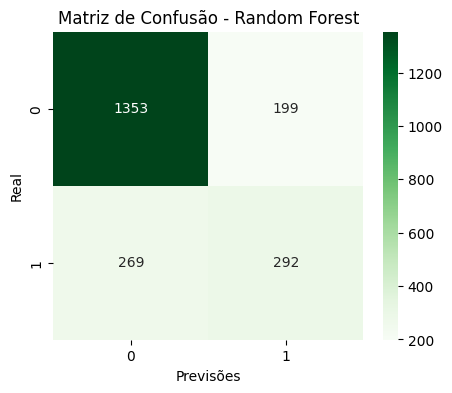

In [ ]:
#Avaliar Modelo 2 — Árvore de Decisão

# --- Previsões
y_pred_rf = rf.predict(X_test)

# --- Relatório de métricas
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("\nRelatório completo:\n", classification_report(y_test, y_pred_rf))

# --- Matriz de confusão
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsões")
plt.ylabel("Real")
plt.show()

### Análise crítica dos modelos

Regressão Logística (com normalização)
Valor da Métrica
Precisão 0,746
Precisão 0,514
Recall 0,800
Pontuação F1 0,626

Pontos positivos:

Excelente recall para a classe 1 (cancelamentos): detecta 80% dos que cancelam.

Isso é útil se nosso objetivo for evitar perder clientes que podem cancelar, embora erros possam ocorrer às vezes.

Pontos fracos:

Baixa precisão para a classe 1: muitos falsos positivos (prevê cancelamento quando não há nenhum).

Isso pode levar a ações desnecessárias em clientes que, na verdade, não iriam cancelar.

Modelo 2: Floresta Aleatória (sem normalização)
Valor da Métrica
Precisão 0,778
Precisão 0,600
Recall 0,492
Pontuação F1 0,541

Pontos positivos:

Maior precisão que o Modelo 1 (menos falsos positivos).

Maior precisão geral do modelo.

Desempenho geral equilibrado.

Pontos fracos:

Menor recall: detecta apenas 49% dos clientes que cancelam.

Pode ignorar quase metade dos cancelamentos, o que é arriscado se é isso que queremos evitar.

##Comparação entre os dois modelos

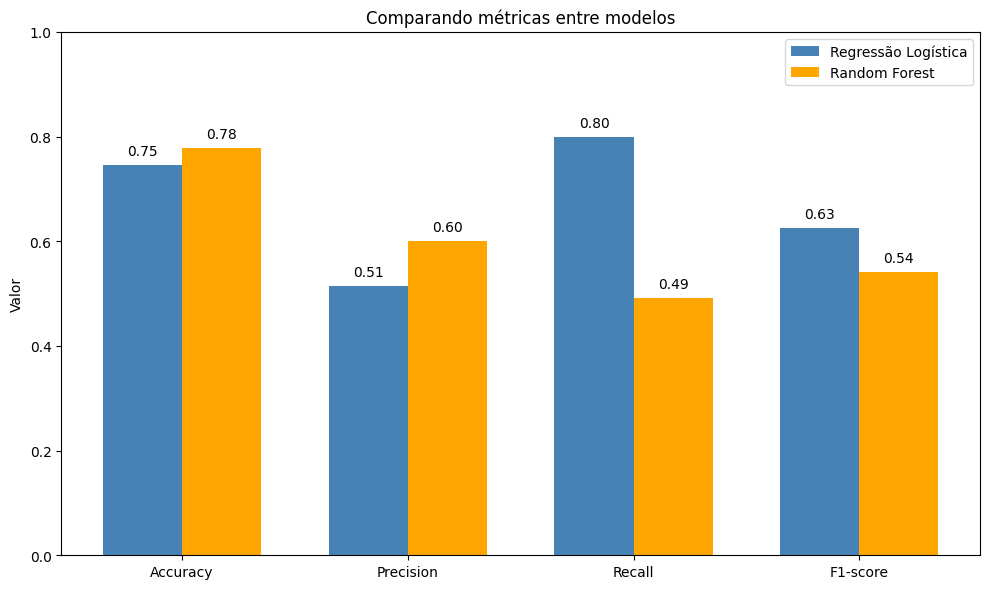

In [ ]:
# Métricas dos modelos
metricas = ['Accuracy', 'Precision', 'Recall', 'F1-score']
logistic_values = [0.746, 0.514, 0.800, 0.626]
rf_values = [0.778, 0.600, 0.492, 0.541]

x = np.arange(len(metricas))
width = 0.35

# gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, logistic_values, width, label='Regressão Logística', color='steelblue')
bars2 = ax.bar(x + width/2, rf_values, width, label='Random Forest', color='orange')

# Tags e título
ax.set_ylabel('Valor')
ax.set_title('Comparando métricas entre modelos')
ax.set_xticks(x)
ax.set_xticklabels(metricas)
ax.set_ylim(0, 1)
ax.legend()

# Adicione valores acima das barras
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

##Overfitting ou Underfitting
Nenhum dos modelos apresenta overfitting óbvio (ambos apresentam desempenho razoavelmente bom nos testes).

A Regressão Logística pode ser uma opção mais adequada ao padrão de cancelamento, mas isso não indica necessariamente overfitting — pode ser um recurso desejável se o custo de falsos positivos for bem gerenciado.

# Interpretação e conclusões

## Análise da Importância das Variáveis


Modelo de regressão logística

In [ ]:
coef = logreg.coef_[0]
variables = X_train.columns

coef_df = pd.DataFrame({
    'Variable': variables,
    'Coeficiente': coef
})
coef_df['Impacto'] = coef_df['Coeficiente'].apply(lambda x: 'Positivo' if x > 0 else 'Negativo')
coef_df = coef_df.sort_values(by='Coeficiente', key=np.abs, ascending=False)

print(coef_df.head(10))

                                  Variable  Coeficiente   Impacto
1                          customer.tenure    -1.601151  Negativo
3                    account.Charges.Total     0.880297  Positivo
11    internet.InternetService_Fiber Optic     0.728631  Positivo
26               account.Contract_Two Year    -0.560289  Negativo
2                  account.Charges.Monthly    -0.482126  Negativo
4                           Contas_Diarias    -0.482126  Negativo
25               account.Contract_One Year    -0.296794  Negativo
22                internet.StreamingTV_Yes     0.261855  Positivo
24            internet.StreamingMovies_Yes     0.239810  Positivo
29  account.PaymentMethod_Electronic Check     0.219003  Positivo


No modelo de regressão logística, a variável com maior peso negativo foi o tempo de permanência, indicando que clientes com maior tempo de permanência têm menor probabilidade de cancelar. Por outro lado, o gasto total e o uso de serviços como internet de fibra óptica e métodos de pagamento como cheque eletrônico estão positivamente relacionados à rotatividade.
Além disso, contratos de um e dois anos reduzem significativamente a probabilidade de rotatividade, destacando a importância de promover compromissos de longo prazo para a retenção. Variáveis associadas a serviços de streaming e faturamento digital também apresentam um ligeiro aumento no risco de rotatividade.

Modelo 2 Arvore de Decisão

In [ ]:
importancia = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': tree.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print(importancia.head(10))

                          Variable  Importancia
28  PaymentMethod_Electronic check     0.269560
1                           tenure     0.174852
3                    Charges.Total     0.123747
2                  Charges.Monthly     0.116404
10     InternetService_Fiber optic     0.056226
26            PaperlessBilling_Yes     0.029705
4                      gender_Male     0.028658
24               Contract_One year     0.025647
9                MultipleLines_Yes     0.017597
0                    SeniorCitizen     0.015481


No modelo de árvore de decisão, a variável mais importante na previsão da rotatividade foi o método de pagamento eletrônico com cheque, seguida pela permanência do cliente e pelo gasto total.
Além disso, variáveis como mensalidade, tipo de serviço de internet e fatores demográficos, como gênero e nível sênior, também contribuíram, embora com menor peso.
De modo geral, a árvore destaca a heterogeneidade dos fatores que influenciam a rotatividade, incluindo dados demográficos e métodos de pagamento.

# Conclusão

## 1. Resumo do Desempenho do Modelo
Dois modelos preditivos foram avaliados para antecipar a rotatividade de clientes:

Regressão Logística (com normalização):

Precisão: 74,6%

Recall (cancelamento): 80,0% (ótima capacidade de detectar rotatividade)

Precisão (cancelamento): 51,4%

Pontuação F1 (cancelamento): 62,6%

Árvore de Decisão (sem normalização):

Precisão: 77,8%

Recall (cancelamento): 49,2% (menor detecção de rotatividade em comparação com a regressão logística)

Precisão (cancelamento): 60,0% (menos falsos positivos do que a regressão)

Pontuação F1 (cancelamento): 54,1%

Interpretação: A regressão logística oferece melhor recall, tornando-a mais adequada para identificar a maioria dos clientes com probabilidade de rotatividade, embora com mais falsos positivos. Por outro lado, a árvore de decisão tem maior precisão e exatidão, mas detecta menos rotatividade.

## 2. Variáveis que mais influenciam a rotatividade
Modelo de Regressão Logística
Tempo de uso: Tempo de uso do cliente. Quanto maior o prazo do contrato, menor a probabilidade de rotatividade.

Cobranças.Total: Clientes com gastos totais mais altos têm maior probabilidade de cancelar.

Cobranças.Mensal: Por outro lado, altas tarifas mensais reduzem a rotatividade, possivelmente associadas a contratos de longo prazo ou clientes premium.

Serviço de Internet_Fibra Óptica: Usuários de fibra óptica apresentam maior risco de rotatividade.

Contrato_Dois anos / Um ano: Contratos de longo prazo reduzem a probabilidade de rotatividade.

Método de Pagamento_Cheque Eletrônico: Método de pagamento eletrônico associado a maior rotatividade.

Modelo de Árvore de Decisão
Método de Pagamento_Cheque Eletrônico: Variável mais relevante; indica uma associação clara entre este método de pagamento e a rotatividade.

Tempo de uso, Cobranças.Total, Cobranças.Mensal: Variáveis importantes consistentes com a regressão logística.

Serviço de Internet_Fibra Óptica: Também destacado como fator de risco.

Faturamento sem papel, gênero, múltiplas linhas e idade também contribuem, embora com menor peso.

## 3. Recomendações Estratégicas para Retenção
Com base nos resultados, propomos as seguintes estratégias para minimizar a rotatividade de clientes:

Incentivar contratos de longo prazo: Contratos de um e dois anos estão associados a uma menor rotatividade. Campanhas ou incentivos podem ser elaborados para incentivar clientes atuais e novos a optarem por compromissos mais longos.

Revisar e aprimorar a experiência dos usuários de fibra óptica: Como essa variável está associada a uma maior rotatividade, é vital entender seus problemas específicos (qualidade do serviço, suporte técnico, preços) e trabalhar para melhorar a satisfação.

Analisar o método de pagamento eletrônico (Cheque Eletrônico): Como está fortemente ligado à rotatividade, revisar possíveis problemas (falhas de pagamento, problemas de confiança ou usabilidade) e oferecer alternativas ou melhorias na experiência de pagamento pode reduzir a rotatividade.

Segmentação baseada em tempo de serviço: Clientes novos ou com tempo de serviço curto têm maior probabilidade de cancelar; campanhas de boas-vindas, suporte personalizado e ofertas especiais podem aumentar sua fidelidade.

Atendimento ao cliente com alto gasto total: embora gastem mais, correm o risco de rotatividade, por isso é aconselhável monitorar sua satisfação e oferecer valor agregado para retê-los.

## 4. Selecionando um Modelo de Implantação
Se a prioridade for capturar o maior número de clientes com probabilidade de cancelamento (minimizar falsos negativos), o modelo de regressão logística é recomendado devido ao seu maior recall.

Se você deseja reduzir alarmes falsos e obter previsões mais precisas, a árvore de decisão é mais adequada.